In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("data/voter_data_cleaned.csv")
df.drop(columns=['V200001'], inplace = True)
df.head()

,V201005,V201006,V201020,V201018,V201016,V201222,V202014,V202016,V202022,V202029,V202219,V201357,V202426,V201357.1,V201360,V201336,V202221,V202222,V202223,V202224
0,2,2,1,2,3,-1,2,2,1,1,2,1,4,1,2,2,3,3,3,3
1,4,3,1,4,3,-1,1,2,1,2,2,1,3,1,2,4,3,3,3,3
2,1,2,1,-1,3,3,2,1,1,1,1,2,1,2,1,4,2,2,2,1
3,2,3,2,2,3,2,2,2,1,2,1,1,2,1,1,1,5,5,5,5
4,2,2,1,4,2,2,2,2,2,2,3,1,3,1,1,3,4,4,4,4


In [4]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,V201005,V201006,V201020,V201018,V201016,V201222,V202014,V202016,V202022,V202029,V202219,V201357,V202426,V201357.1,V201360,V201336,V202221,V202222,V202223,V202224
0,-0.299850,0.551519,-0.687556,0.797403,0.739692,-0.921670,0.355311,0.347483,0.292356,0.069559,0.228245,-0.523372,0.684664,-0.523372,0.340330,-0.636742,0.341057,0.289843,0.218350,0.400306
1,1.621048,1.951452,-0.687556,1.911467,0.739692,-0.921670,-0.055924,0.347483,0.292356,0.491188,0.228245,-0.523372,0.363655,-0.523372,0.340330,0.619447,0.341057,0.289843,0.218350,0.400306
2,-1.260300,0.551519,-0.687556,-0.873693,0.739692,1.771616,0.355311,-0.064187,0.292356,0.069559,-0.125729,0.549547,-0.278363,0.549547,-0.630033,0.619447,0.019642,-0.025975,-0.085505,-0.254416
3,-0.299850,1.951452,0.744636,0.797403,0.739692,1.098295,0.355311,0.347483,0.292356,0.491188,-0.125729,-0.523372,0.042646,-0.523372,-0.630033,-1.264837,0.983886,0.921479,0.826060,1.055027
4,-0.299850,0.551519,-0.687556,1.911467,-0.042911,1.098295,0.355311,0.347483,0.751083,0.491188,0.582220,-0.523372,0.363655,-0.523372,-0.630033,-0.008648,0.662472,0.605661,0.522205,0.727666


In [5]:
pca_2d = PCA(n_components=2)
df_pca_2d = pd.DataFrame(pca_2d.fit_transform(df_scaled), columns=['PC1', 'PC2'])
print(f"PCA 2D Explained Variance: {sum(pca_2d.explained_variance_ratio_):.4f}")
print(f"PCA 1 Explained Variance: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"PCA 2 Explained Variance: {pca_2d.explained_variance_ratio_[1]:.4f}")
df_pca_2d.head()

PCA 2D Explained Variance: 0.5563
PCA 1 Explained Variance: 0.4475
PCA 2 Explained Variance: 0.1087


,PC1,PC2
0,1.038712,-0.902767
1,0.897287,-0.440885
2,0.002363,0.725333
3,1.674369,-1.059879
4,1.724323,-0.816609


/Users/wesleyallen/Downloads/FALL24/CSCI5622/semester_project/env/lib/python3.11/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


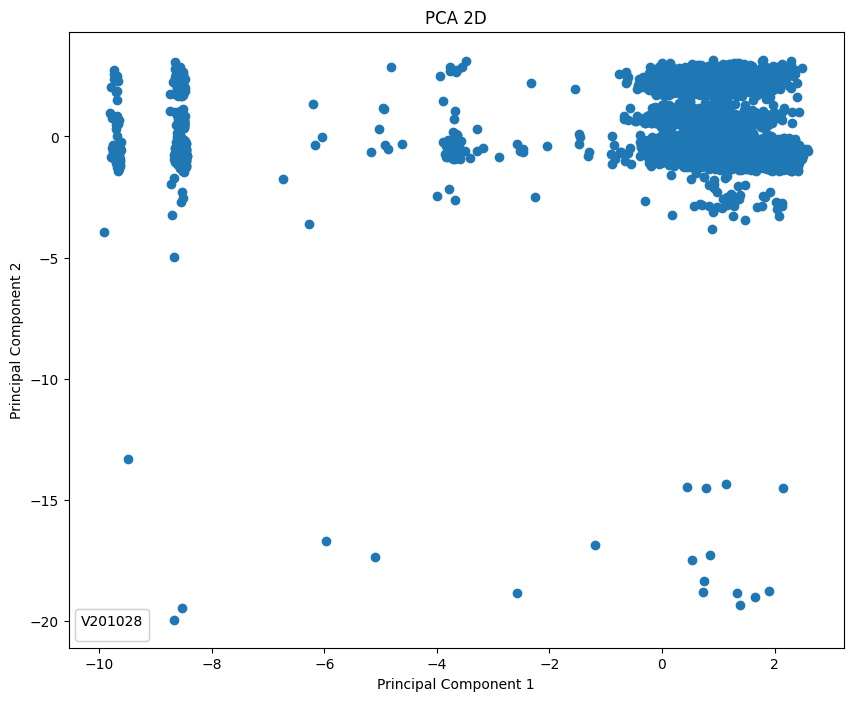

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(df_pca_2d['PC1'], df_pca_2d['PC2'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA 2D')
legend1 = ax.legend(*scatter.legend_elements(), title="V201028")
ax.add_artist(legend1)
plt.show()


In [7]:
pca_3d = PCA(n_components=3)
df_pca_3d = pd.DataFrame(pca_3d.fit_transform(df_scaled), columns=['PC1', 'PC2', 'PC3'])
print(f"PCA 3D Explained Variance: {sum(pca_3d.explained_variance_ratio_):.4f}")
print(f"PCA 1 Explained Variance: {pca_3d.explained_variance_ratio_[0]:.4f}")
print(f"PCA 2 Explained Variance: {pca_3d.explained_variance_ratio_[1]:.4f}")
print(f"PCA 3 Explained Variance: {pca_3d.explained_variance_ratio_[2]:.4f}")
df_pca_3d.head()


PCA 3D Explained Variance: 0.6521
PCA 1 Explained Variance: 0.4475
PCA 2 Explained Variance: 0.1087
PCA 3 Explained Variance: 0.0959


,PC1,PC2,PC3
0,1.038712,-0.902767,-0.230846
1,0.897287,-0.440885,1.483096
2,0.002363,0.725333,-1.141509
3,1.674369,-1.059879,0.908777
4,1.724323,-0.816609,-0.320405


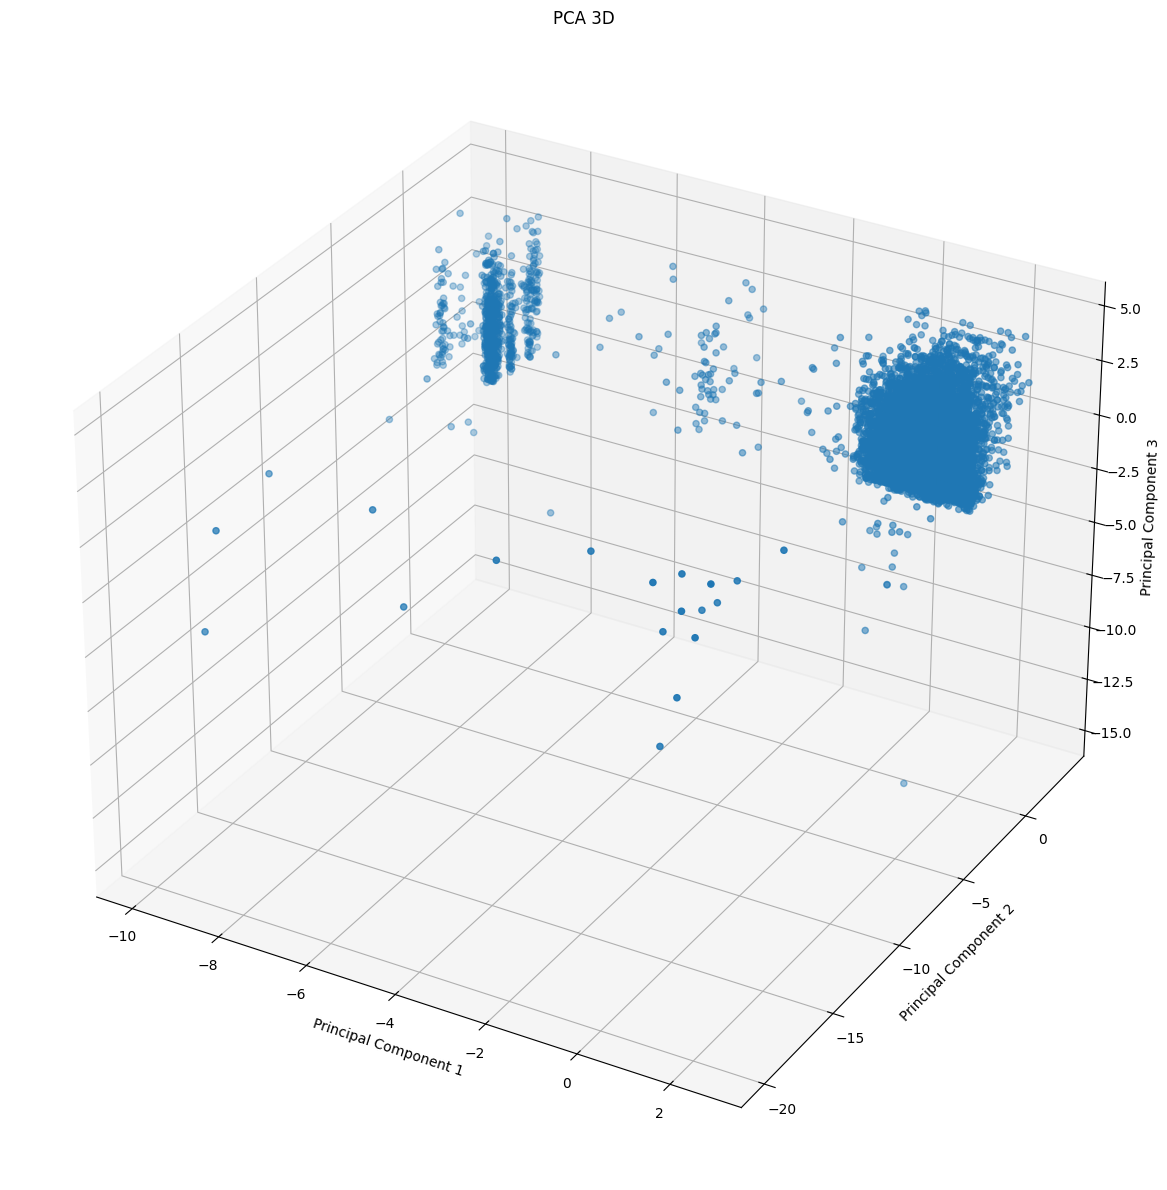

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA 3D')

plt.tight_layout()
plt.subplots_adjust(right=1.5)
plt.show()



In [9]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)
print(f"Number of components to explain 95% of the variance: {pca.n_components_}")



Number of components to explain 95% of the variance: 10
